# Data Visualization

First, lets's import some tools.

In [153]:
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for beautifying plots
import urllib.request
from astropy.io import ascii # for reading in files

# some optional seaborn preferences to tweak the look
# more here: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_color_codes('deep')
sns.set_palette('deep')

# for displaying high def plots in the notebook
%config InlineBackend.figure_format = 'retina'

## Downloading the data

Alright, now let's download `allplanets-csv.csv` from [tepcat](http://www.astro.keele.ac.uk/jkt/tepcat/) and read it into a table called
`t`.

In [85]:
# download the file
url = 'http://www.astro.keele.ac.uk/jkt/tepcat/allplanets-csv.csv'
urllib.request.urlretrieve(url, 'allplanets-csv.csv')

('allplanets-csv.csv', <http.client.HTTPMessage at 0x1a10eb5630>)

## Dealing with duplicate names in the header \*groan\*

In [139]:
# open the file
with open('allplanets-csv.csv') as f:
    header = f.readline() # save the first line
    data = f.readlines() # save all the other lines

# replace every instance of '..err..' with 'err_N' where N is some number
header = header.split()
for i, word in enumerate(header):
    if 'err' in word:
        word_idx = header.index(word)
        header[word_idx] = f'err_{i}'

# merge all the words into a single comma separated string
header = ' '.join(header)
header += '\n' # tack on a newline to mark the end of the header

# write the modified data to a new file
with open('new.csv', 'w') as f:
    f.write(header)
    f.writelines(data)

## Displaying the data

Now that that annoying header business is out of the way, let's take a look at the data!

In [140]:
# read into a table and display
t = ascii.read('new.csv')
t.show_in_notebook() 
# the <show_in_noteook> attribute supports interactive table search = D

idx,System,Teff,err_4,err_6,[Fe/H],err_9,err_11,M_A,err_15,err_17,R_A,err_21,err_23,loggA,err_27,err_29,rho_A,err_33,err_35,Period,e,err_41,err_43,a(AU),err_47,err_49,M_b,err_53,err_55,R_b,err_59,err_61,g_b,err_65,err_67,rho_b,err_71,err_73,Teq,err_77,err_79,Discovery_reference,Recent_reference
0,55_Cnc_e,5196,24,24,0.31,0.04,0.04,0.905,0.015,0.015,0.943,0.01,0.01,4.43,0.05,0.05,-1.0,-1.0,-1.0,0.737,0.057,0.064,0.041,0.01544,9e-05,9e-05,0.0254,0.001,0.001,0.1704,0.0071,0.0071,21.4,2.1,1.9,4.82,0.6,0.53,2349.0,188.0,193.0,2011ApJ...737L..18W,2016Natur.532..207D
1,AD_3116,3184,29,29,0.14,0.1,0.1,0.276,0.02,0.02,0.29,0.08,0.08,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.983,0.146,0.024,0.016,-1.0,-1.0,-1.0,54.2,4.3,4.3,1.02,0.28,0.28,-1.0,-1.0,-1,-1.0,-1.0,-1.0,1669.0,244.0,258.0,2017ApJ...849...11G,2017ApJ...849...11G
2,CoRoT-01,5950,150,150,-0.3,0.25,0.25,0.95,0.11,0.11,1.131,0.045,0.045,4.311,0.019,0.019,0.66,0.019,0.019,1.509,0.0,-1.0,-1.0,0.02536,0.00138,0.00022,1.03,0.1,0.1,1.551,0.064,0.064,10.65,0.69,0.69,0.259,0.021,0.021,1915.0,49.0,49.0,2008A+A...482L..17B,2011MNRAS.417.2166S
3,CoRoT-02,5598,50,50,0.04,0.05,0.05,0.997,0.049,0.049,0.901,0.019,0.019,4.527,0.017,0.017,1.362,0.064,0.064,1.743,0.0143,0.0077,0.0077,0.02835,0.00047,0.00047,3.57,0.15,0.15,1.46,0.031,0.031,41.5,1.7,1.7,1.073,0.058,0.058,1521.0,18.0,18.0,2008A+A...482L..21A,2012MNRAS.426.1291S
4,CoRoT-03,6558,44,44,0.14,0.04,0.04,1.403,0.061,0.061,1.575,0.094,0.094,4.191,0.046,0.046,0.359,0.058,0.058,4.257,0.0,-1.0,-1.0,0.05783,0.0011,0.00049,21.96,0.703,0.703,1.037,0.069,0.069,506.0,67.0,67,18.4,3.7,3.7,1695.0,57.0,57.0,2008A+A...491..889D,2011MNRAS.417.2166S
5,CoRoT-04,6190,60,60,0.05,0.07,0.07,1.194,0.049,0.05,1.148,0.092,0.032,4.396,0.024,0.068,0.79,0.064,0.161,9.202,0.0,-1.0,-1.0,0.0912,0.00125,0.0013,0.731,0.071,0.072,1.16,0.115,0.04,13.5,1.6,2.6,0.438,0.062,0.116,1058.0,42.0,17.0,2008A+A...488L..43A,2011MNRAS.417.2166S
6,CoRoT-05,6100,65,65,-0.25,0.06,0.06,1.025,0.1,0.059,1.0516,0.0811,0.0673,4.405,0.068,0.059,0.88,0.21,0.16,4.038,0.09,0.09,0.04,0.05004,0.00162,0.00097,0.469,0.057,0.03,1.182,0.102,0.098,8.3,1.8,1.3,0.266,0.081,0.058,1348.0,50.0,51.0,2009A+A...506..281R,2011MNRAS.417.2166S
7,CoRoT-06,6090,70,70,-0.2,0.1,0.1,1.054,0.063,0.063,1.043,0.03,0.03,4.425,0.022,0.022,0.929,0.064,0.064,8.887,0.0,-1.0,-1.0,0.0855,0.0017,0.0017,2.96,0.34,0.34,1.185,0.041,0.041,52.3,6.4,6.4,1.66,0.23,0.23,1025.0,16.0,16.0,2010A+A...512A..14F,2011MNRAS.417.2166S
8,CoRoT-07,5259,58,58,0.138,0.061,0.061,0.913,0.017,0.017,0.82,0.019,0.019,4.573,0.011,0.011,1.671,0.073,0.073,0.854,0.0,0.32,0.0,0.01702,0.00017,4e-05,0.0181,0.0027,0.0027,0.1414,0.0057,0.0057,21.5,3.5,3.0,5.7,1.1,1.1,1756.0,27.0,27.0,2009A+A...506..287L,2014A+A...569A..74B
9,CoRoT-08,5080,80,80,0.31,0.05,0.05,0.878,0.085,0.085,0.898,0.09,0.09,4.475,0.077,0.077,1.21,0.32,0.32,6.212,0.0,-1.0,-1.0,0.0633,0.002,0.002,0.216,0.036,0.036,0.712,0.083,0.083,10.6,2.9,2.9,0.56,0.21,0.21,922.0,41.0,41.0,2010A+A...520A..66B,2011MNRAS.417.2166S


## Data Visualization

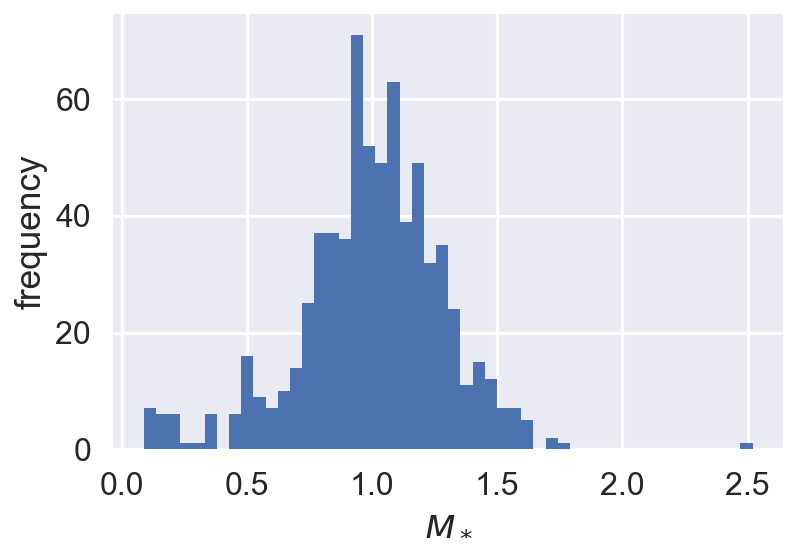

In [165]:
# now that each header name is unique, we can reference them
M_star = t['M_A']

# and plot
plt.hist(M_star, bins=50)
plt.xlabel(r'$M_*$')
plt.ylabel('frequency')
plt.show()

It looks like the majority of observed transiting planets are around $0.8 M_\odot$ or so. Why is this? Is there a selection bias? It would be helpful to do a similar analysis with data from all types of confirmed planets, not just ones we happen to see with transits. The binning of the histogram also plays a role.